### Heatmap 

***A Heatmap is a type of visualization that helps us understand the distribution or density of data points in a 2-dimensional space. It is often used as an alternative to a scatterplot.***

In a scatterplot, we plot the values of two numeric variables on the x and y axes. However, in a heatmap, instead of plotting individual points, we divide the plotting area into a grid and count the number of points that fall into each grid rectangle. These counts are then represented using colors.

The color of each grid cell in the heatmap indicates the density or intensity of the data points in that region. For example, a cell with a darker color may indicate a higher number of data points, while a lighter color may indicate a lower number of data points.

To create a heatmap, we can use the hist2d() function in Matplotlib, which calculates the counts and assigns colors to the grid cells based on the 

### Density

***Density refers to the concentration or distribution of something within a given area or space. In the context of a heatmap, density refers to the number of data points that are present in a specific region or grid cell.***

When we talk about density in a heatmap, we are essentially looking at how crowded or sparse the data points are in different areas of the plot. A higher density means that there are more data points in a particular region, while a lower density means that there are fewer data points in that region.

By representing density using colors in a heatmap, we can visually identify areas where the data points are more concentrated or sparse. This can help us identify patterns, trends, or areas of interest in the data.

### Distribution

***Distribution refers to how data is spread out or arranged. It describes the pattern or shape of the data when plotted on a graph or chart.***

In the context of a heatmap, distribution refers to how the data points are distributed or arranged across the grid cells. It helps us understand the variation and concentration of the data within different regions of the plot.

There are different types of distributions that we commonly encounter in data analysis, such as:

Normal Distribution: Also known as the bell curve, it is a symmetric distribution where the data is centered around the mean and follows a specific pattern.

Skewed Distribution: A distribution that is not symmetric and has a longer tail on one side. It can be either positively skewed (tail on the right) or negatively skewed (tail on the left).

Uniform Distribution: A distribution where the data points are evenly spread out across the range without any significant peaks or valleys.

Understanding the distribution of data is important because it helps us identify patterns, and outliers, and make inferences about the underlying population. Heatmaps can provide a visual representation of the distribution of data points, allowing us to observe any patterns or trends that may exist.

### Some Example of different types of distributions

Here are some examples of different types of distributions:
Normal Distribution:



1. Normal Distribution:
     - Asymmetric bell-shaped curve with a peak at the mean.
     - It is characterized by its mean and standard deviation.
     - Example: Heights of individuals in a population.
     

2. Uniform Distribution:
    - A constant probability distribution where all outcomes are equally likely.
    - It forms a rectangle shape.
    - Example: Rolling a fair die.
    

3. Exponential Distribution:
    - A continuous probability distribution that describes the time between events in a Poisson process.
    - It is characterized by its rate parameter.
    - Example: Time between phone calls at a call center.
    

4. Binomial Distribution:
    - A discrete probability distribution of the number of successes in a fixed number of independent Bernoulli trials.
    - It is characterized by its number of trials and success probability.
    - Example: Number of heads obtained when flipping a coin multiple times.




# Normal Distribution
![Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/500px-Normal_Distribution_PDF.svg.png)


# Uniform Distribution 
![Uniform Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/500px-Uniform_Distribution_PDF_SVG.svg.png)

# Exponential Distribution 
![Exponential Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Exponential_pdf.svg/500px-Exponential_pdf.svg.png)

# Binomial Distribution 
![Binomial Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Binomial_distribution_pmf.svg/500px-Binomial_distribution_pmf.svg.png)

### Heat maps are useful in the following cases:

1. To represent a plot for discrete vs. another discrete variable
2. As an alternative to transparency when the data points are enormous

## Example 1. Default heat plot using Matplotlib.pyplot.hist2d() function

In [3]:
# Import Necessary Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

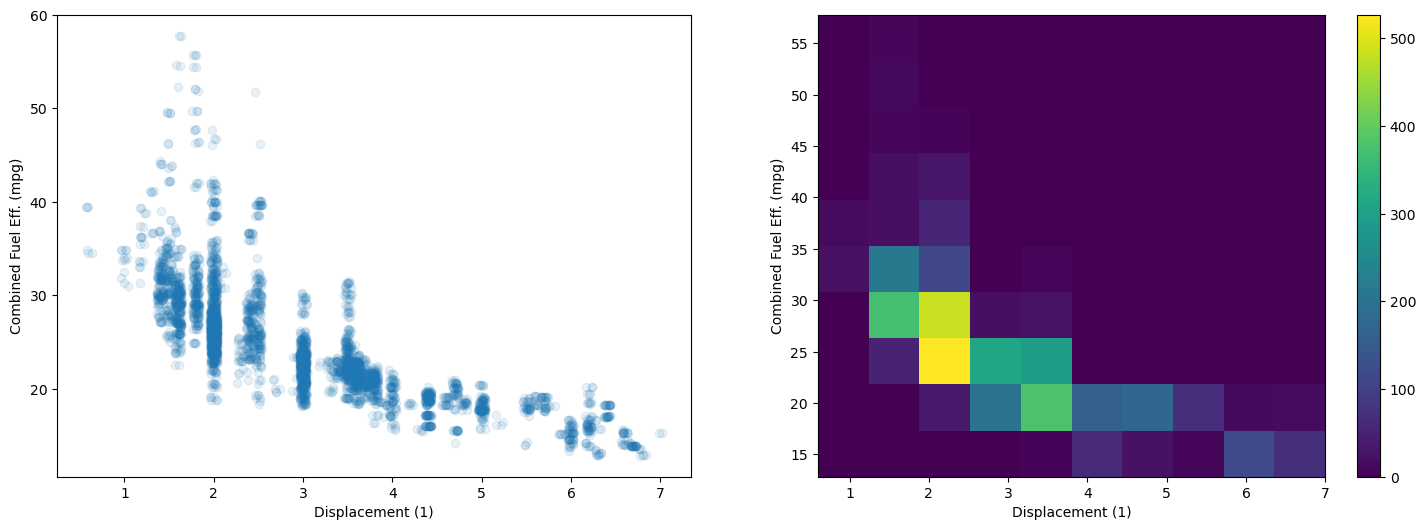

In [9]:
# Load Data Set
fuel_econ = pd.read_csv('./fuel-econ.csv')

# Define Figure Size
plt.figure(figsize=[18, 6])

# Plot on left
plt.subplot(1, 2, 1)
sb.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=0.04, scatter_kws={'alpha': 1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Plot on Right
plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

## Additional Variations
To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on this part of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting cmap = 'viridis_r'.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

## Example 2. Heat plot - Set a minimum bound on counts and a reverse color map

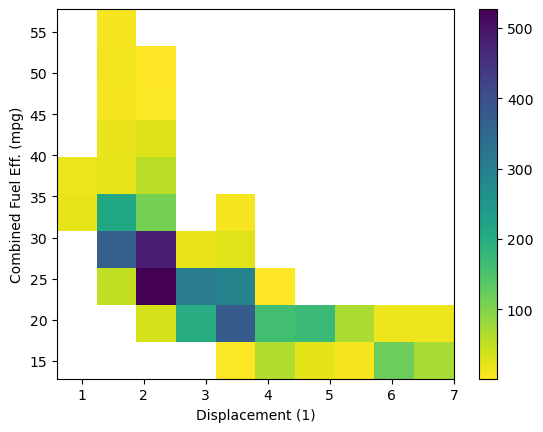

In [20]:
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmap='viridis_r', cmin=0.5)
plt.colorbar();
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Example 3. Heat plot - Specify bin edges


In [24]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


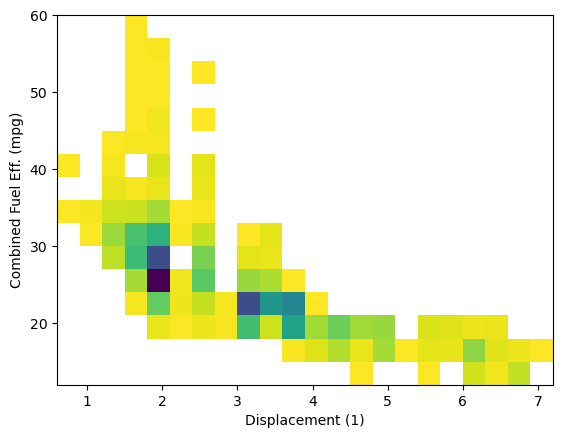

In [27]:
bin_x = np.arange(0.6, 7+0.3, 0.3)
bin_y = np.arange(12, 58+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', bins=[bin_x, bin_y], cmin=0.5, cmap='viridis_r')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram.

## Example 4. Add text annotation on each cell using pyplot.text() function

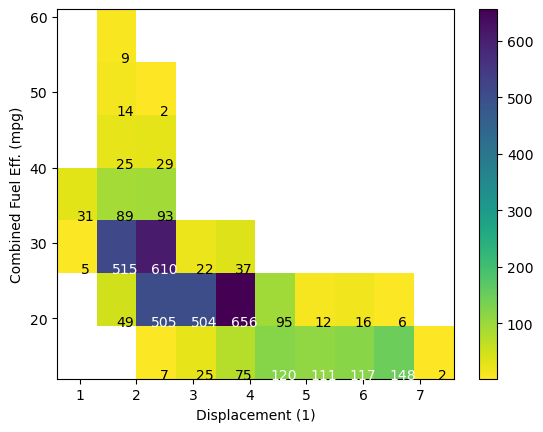

In [28]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')